<a href="https://colab.research.google.com/github/sejinseo/Python/blob/main/py21_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import numpy as np                # ndarray
import pandas as pd               # Series, DataFrame
import matplotlib.pyplot as plt   # 시각화(그래프)
import seaborn as sns             # 시각화, 예제 데이터셋

# 데이터셋

In [125]:
tips = sns.load_dataset('tips')

In [126]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
tips.shape

(244, 7)

# `matplotlib.pyplot` 모듈을 사용한 시각화

1. `figure` 객체 생성
1. `figure` 객체에 subplot을 생성해서 추가
1. subplot에 그래프를 그림.
1. 그래프의 여러가지 옵션들을 설정.
1. 그래프 보여주기.


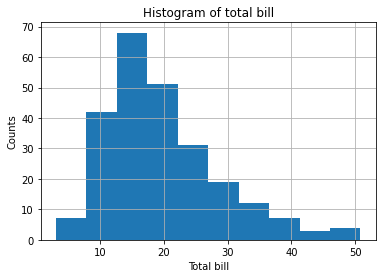

In [128]:
# 1. figure 객체 생성
fig = plt.figure()

# 2. figure 객체의 subplot을 추가.
axis = fig.add_subplot(1, 1, 1)  
#> add_subplot(nrow, ncols, index): nrows(행의 개수), ncols(열의 개수), index(subplot의 인덱스)
#> subplot의 인덱스는 1부터 시작.

# 3. subplot에 그래프를 그림.
axis.hist(x=tips['total_bill']) # histogram(히스토그램)

# 4. 그래프 옵션 설정
axis.set_title('Histogram of total bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Counts')
axis.grid()

# 5. 그래프 보여주기
plt.show()

2개의 subplot을 상/하로 배치하고 그래프 그리기

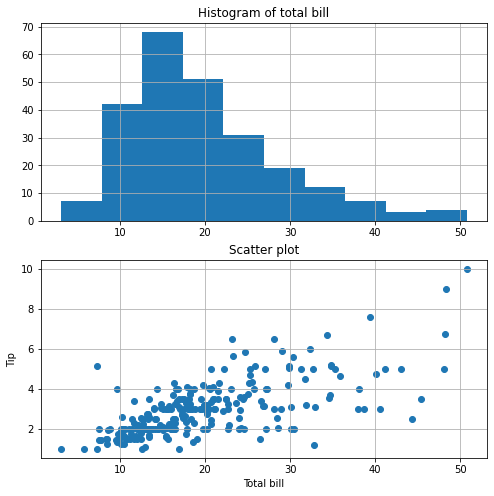

In [129]:
# 1. figure 생성
fig = plt.figure(figsize=(8, 8))

# 2. subplot을 추가
axis1 = fig.add_subplot(2, 1, 1)
axis2 = fig.add_subplot(212) # add_subplot(2, 1, 2)와 동일.

# 3. 각각의 subplot에 그래프를 그림.
axis1.hist(x=tips['total_bill']) # 히스토그램
axis2.scatter(x=tips['total_bill'], y=tips['tip']) # 산점도 그래프

# 4. 각각의 그래프 옵션 설정
axis1.set_title('Histogram of total bill')
axis1.grid()
axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')
axis2.grid()

# 5. 그래프 보여주기
plt.show()

2개의 subplot을 좌/우로 배치해서 그래프 그리기

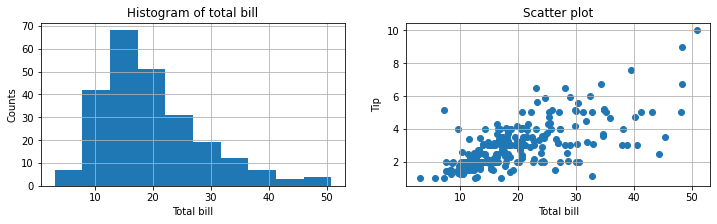

In [130]:
fig = plt.figure(figsize=(12, 3))

axis1 = fig.add_subplot(121) # nrows=1, ncols=2, index=1
axis2 = fig.add_subplot(122) # nrows=1, ncols=2, index=2

axis1.hist(x=tips['total_bill']) # 히스토그램
axis2.scatter(x=tips['total_bill'], y=tips['tip']) # 산점도

# 그래프1 옵션
axis1.set_title('Histogram of total bill')
axis1.set_xlabel('Total bill')
axis1.set_ylabel('Counts')
axis1.grid()

# 그래프2 옵션
axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')
axis2.grid()

plt.show()

`plt.subplots()`: figure 객체 생성(`plt.figure()`) + subplot 추가(`figure.add_subplot()`)

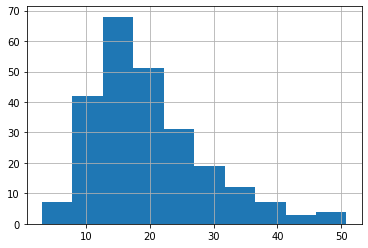

In [131]:
# figure 객체 생성 + subplot 추가
fig, ax = plt.subplots() # nrows=1, ncols=1
#> fig: Figure 클래스의 객체
#> ax: Subplot 객체 또는 Subplot 객체들의 배열(ndarray)

# subplot에 그래프 그림.
ax.hist(x=tips['total_bill'])

# 그래프 옵션
ax.grid()

# 그래프 보여주기
plt.show()

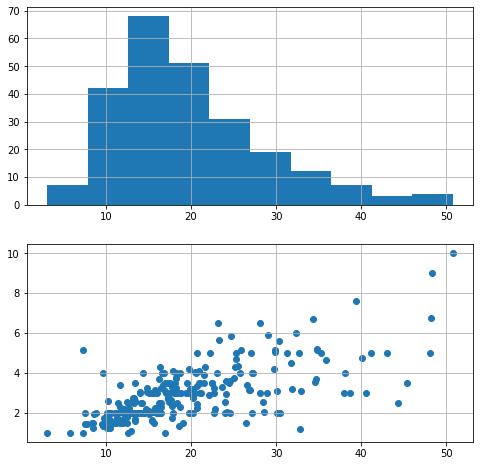

In [132]:
# plt.subplots() 함수를 사용해서 상/하로 배치한 그래프 2개(hist, scatter)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

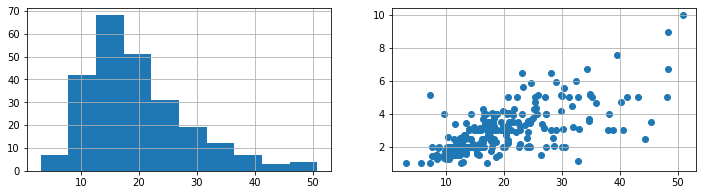

In [133]:
# plt.subplots() 함수를 사용해서 좌/우로 배치한 그래프 2개(hist, scatter)

fig, ax = plt.subplots(ncols=2, figsize=(12, 3))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

Figure 객체에 1개의 subplot만 있는 경우에는 `matplotlib.pyplot` 모듈의 top-level 함수들(`plot, scatter, hist, ...`)을 사용해서 간단히 그래프를 그릴 수 있음.

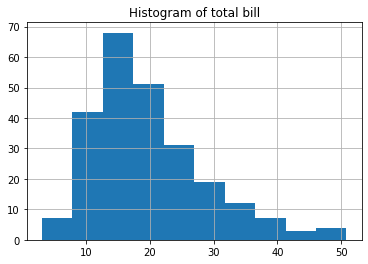

In [134]:
# Figure 생성 + Figure에 1개의 subplot을 추가 + subplot에서 히스토그램 그림
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram of total bill')
plt.grid()

# 그래프 보여주기
plt.show()

# Box Plot

숫자 타입 변수의 기술 통계량(descriptive statistics)을 상자 모양으로 시각화

* 최솟값, 최댓값, 4분위값(25%, 중앙값, 75%)

In [135]:
# tips 데이터프레임의 total_bill 변수(컬럼)의 기술 통계량
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

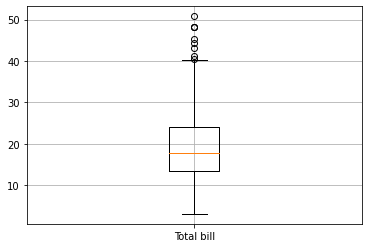

In [136]:
plt.boxplot(x=tips['total_bill'], labels=['Total bill'])
plt.grid()
plt.show()

In [137]:
# IQR(inter-quartile range): 박스 크기(75% - 25%)
iqr = 24.127500 - 13.347500
iqr

10.780000000000001

In [138]:
upper_fence = 24.127500 + iqr * 1.5 # upper_fence = 75% + iqr * 1.5
upper_fence

40.2975

In [139]:
lower_fence = 13.347500 - iqr * 1.5 # lower_fence = 25% - iqr * 1.5
lower_fence

-2.8225000000000016

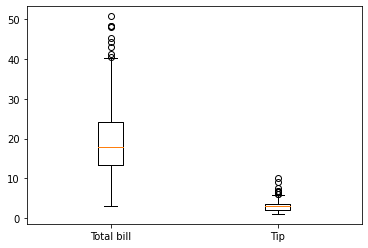

In [140]:
# total_bill, tip의 box plot
plt.boxplot(x=[tips['total_bill'], tips['tip']], labels=['Total bill', 'Tip'])
plt.show()

성별 tip의 기술 통계량을 시각화 - 남성/여성의 tip의 최솟값, 최댓값, 4분위수

In [141]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [142]:
# 여성들의 tip
female_tip = tips[tips['sex'] == 'Female']['tip']

In [143]:
# 남성들의 tip
male_tip = tips[tips['sex'] == 'Male']['tip']
male_tip

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

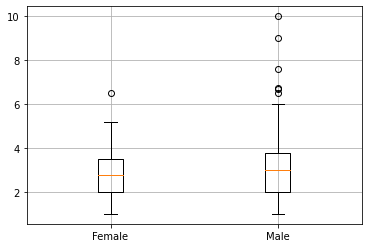

In [145]:
plt.boxplot(x=np.array([female_tip, male_tip], dtype=object), labels=['Female', 'Male'])
plt.grid()
plt.show()

요일별 tip의 기술 통계량 시각화

In [151]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [157]:
tip_sun = tips[tips['day'] == 'Sun']['tip']
tip_sat = tips[tips['day'] == 'Sat']['tip']
tip_thur = tips[tips['day'] == 'Thur']['tip']
tip_fri = tips[tips['day'] == 'Fri']['tip']

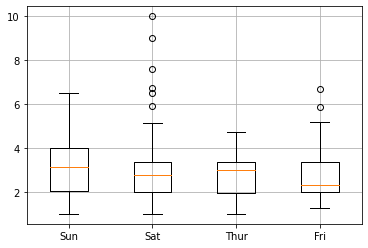

In [159]:
plt.boxplot(x=np.array([tip_sun, tip_sat, tip_fri, tip_thur], dtype=object),
            labels=['Sun', 'Sat', 'Thur', 'Fri'])
plt.grid()
plt.show()

In [162]:
days = tips['day'].unique()
days

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

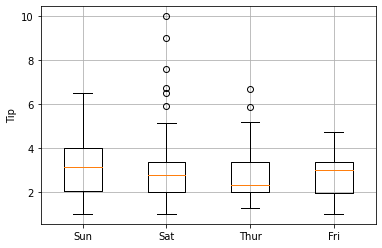

In [165]:
tip_by_day = [] # 요일별 팁을 저장하기 위한 빈 리스트
for d in days:
    tip = tips[tips['day'] == d]['tip']
    tip_by_day.append(tip)

plt.boxplot(x=np.array(tip_by_day, dtype=object),
            labels=days)
plt.grid()
plt.ylabel('Tip')
plt.show()

# 히스토그램(Histogram)

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 수를 막대로 표현한 그래프

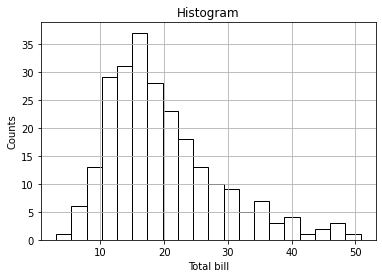

In [173]:
# 영수증 금액의 히스토그램
plt.hist(x=tips['total_bill'], bins=20, edgecolor='black', color='white')
#> bins= 막대 개수, 구간
#> color= 막대를 채우는 색깔
#> edgecolor= 막대 테두리 색깔
plt.title('Histogram')
plt.xlabel('Total bill')
plt.ylabel('Counts')
plt.grid()
plt.show()

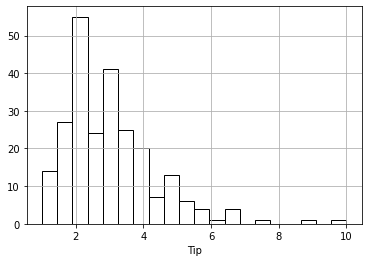

In [180]:
# 팁의 히스토그램
plt.hist(x=tips['tip'], bins=20, color='white', edgecolor='black')
plt.xlabel('Tip')
plt.grid()
plt.show()

# Bar plot

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프

In [184]:
# 성별 빈도수 - 남성 / 여성 숫자
gender_counts = tips['sex'].value_counts()
gender_counts #> pd.Series

Male      157
Female     87
Name: sex, dtype: int64

In [186]:
gender_counts.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')

In [188]:
gender_counts.values

array([157,  87])

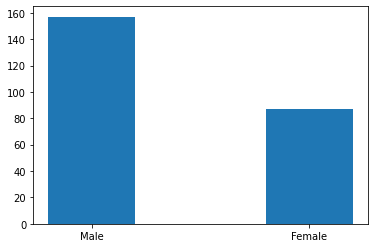

In [192]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width=0.4)
plt.show()

가로 막대 그래프(horizontal bar plot)

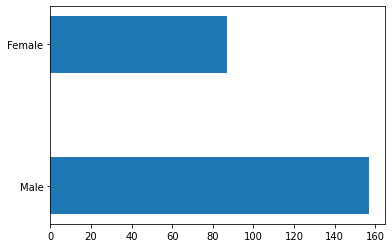

In [194]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height=0.4)
plt.show()

요일별 빈도수 세로/가로 막대 그래프

In [208]:
day_counts = tips['day'].value_counts()
day_counts

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

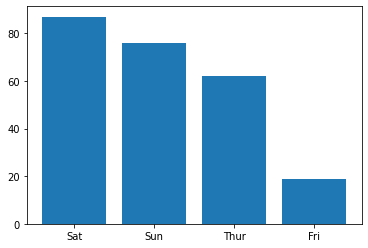

In [211]:
plt.bar(x=day_counts.index, height=day_counts.values)
plt.show()

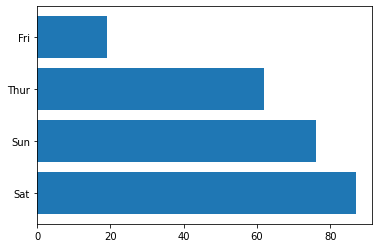

In [212]:
plt.barh(y=day_counts.index, width=day_counts.values)
plt.show()

size(테이블 손님 수)별 빈도수 세로 막대 그래프

In [214]:
size_counts = tips['size'].value_counts()
size_counts

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

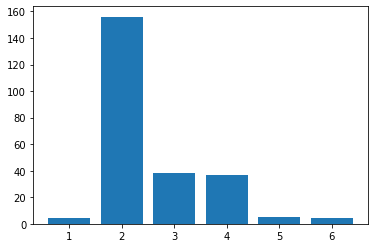

In [216]:
plt.bar(x=size_counts.index, height=size_counts.values)
plt.show()

# 산점도(Scatter plot)

두 변수 사이의 상관 관계를 파악하기 위해서 사용.

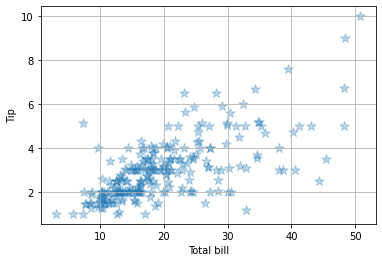

In [233]:
# tip ~ total_bill 관계를 산점도로 시각화
plt.scatter(x=tips['total_bill'], y=tips['tip'],
            alpha=0.3, marker='*', s=100)
#> alpha=불투명도(0.0: 투명 ~ 1.0: 불투명)
#> marker=점의 모양(o, s, ^, v, x, +, *, ...)
#> s=점의 크기(size)
#> color=점의 색깔

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

`tip ~ size` scatter plot

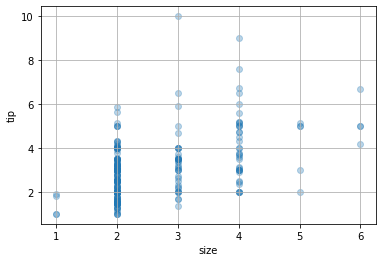

In [237]:
plt.scatter(x=tips['size'], y=tips['tip'], alpha=0.3)

plt.xlabel('size')
plt.ylabel('tip')
plt.grid()
plt.show()